In [1]:
from glob import iglob
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import json
import os
import time

In [2]:
src_dirname = ''

In [3]:
logs = []

for filename in iglob(os.path.join(src_dirname, "*.json")):
    with open(filename, 'r') as infile:
        log = json.load(infile)
        logs.append(log)        

[00:00] A: Do you have an image with a child and a parent sprinkling something on pizza?
[00:10] B: yes
[00:31] A: Child and mother looking at something on fridge?
[00:45] B: yes, and the picture is dark
[00:53] A: Fridge is dark?
[01:03] B: yes, a bit shadowy
[01:15] A: Ok. Only man body and fridge
[01:24] B: is the fridge open?
[01:31] A: No
[01:39] B: i don't have it then
[01:59] A: Blurry man walking to left?
[02:15] B: no. girl showing a birthday cake?
[02:24] A: true
[02:44] B: girl cooking a pizza?
[03:06] A: With her hands stretched to front on wooden pizza thingy?
[03:10] B: yes
[03:13] A: yes
[03:22] B: girl looking at a pizza?
A submitted his or her selection
[03:56] B: man opening a fridge?
[03:56] A: no
B submitted his or her selection
[04:21] A: No
[04:36] B: good
-- NEXT ROUND --
[05:01] A: Man with glasses looking left
[05:09] B: no
[05:22] A: female with hands in front again with wooden pizza thigny
[05:27] B: yes
[05:47] A: baby and father sprinkling on pizza again.. 

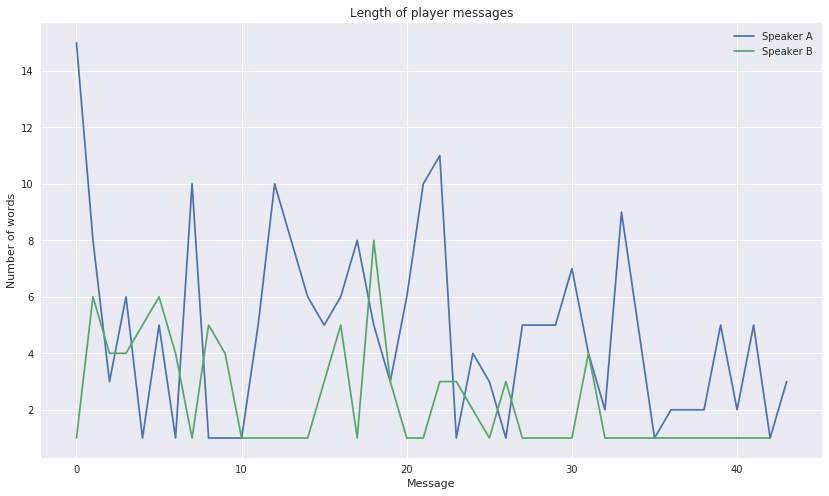


--------------

[00:00] A: I have an image of a women with a pink shirt holding a pink pie
[00:45] B: I do too, I also have a guy who is cleaning his refridgerator with a vacuum cleaner
[01:33] A: I don't have that one, I have a picture of a woman in a blue shirt doing something with dough
[02:19] B: I do too, I also have a woman in a purple sweater looking at a pizza
[02:57] A: I don't have that one, I do have a picture with a child and her father sprinkling shit on a pizza
[03:56] B: I do too, my last picture is of two girls looking at things they hanged up on a refridgerator
[05:02] A: I have that one as well. I also have a picture of a guy in a black t shirt standing next to a refrigerator
B submitted his or her selection
A submitted his or her selection
[05:47] A: done
[05:51] B: done
-- NEXT ROUND --
[06:22] A: I have the same picture of a girl with a blue shirt doing shit with dough
[07:00] B: I do too, I also have the same pink girl as previous
[07:13] A: I dont, do have the c

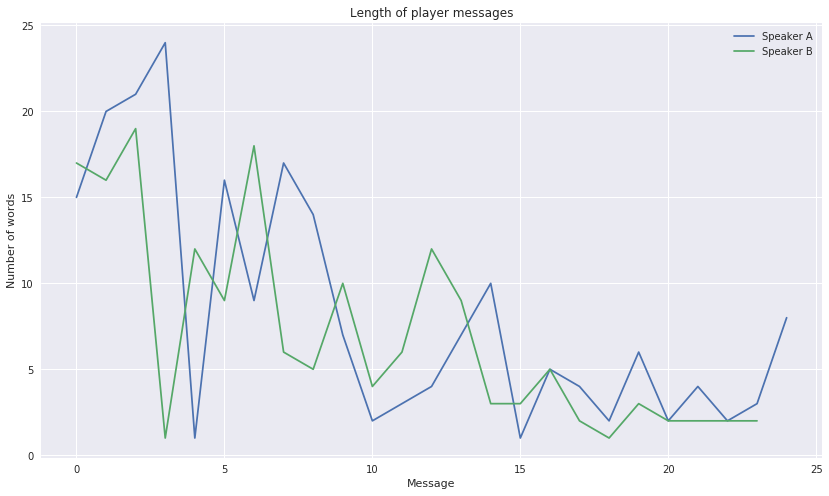


--------------



KeyError: 'speaker:'

In [6]:
for i, game_data in enumerate(logs):
    start_time = None
    games = []
    
    for round_data in game_data['rounds']:
        rounds = []
        next_round = False
        for message_data in round_data['messages']:
            utterances = []
            if start_time is None:
                start_time = message_data['timestamp']
            
            timestamp = message_data['timestamp'] - start_time
            m, s = divmod(timestamp, 60)
            
            timestamp_string = "%02d:%02d" % (m, s)
            
            token = message_data['message'].split()[0]
            if token == "<feedback>":
                print(message_data['speaker'] + " submitted his or her selection")
            elif token == "<next_round>":
                if next_round:
                    print("-- NEXT ROUND --")
                    next_round = False
                else:
                    next_round = True
            elif token == "<selection>":
                # print(message_data['speaker'] + " marked an image")
                pass
            else:
                print("[" + timestamp_string +"] " + str(message_data['speaker']) + ": " + str(message_data['message']))
                utterances.append((message_data['speaker'] , str(message_data['message'])))
                rounds.append(utterances) 
        
        games.append(rounds)
            
    for r, rounds in enumerate(games):        
        word_counter = 0
        for round_messages in rounds:
            for message in round_messages:
                word_counter += len(message[1].split(" "))
        print("Round {} took {} messages and {} words".format(r+1, len(rounds), word_counter))  
    
    message_dict = defaultdict(lambda: [])
    for rounds in games:        
        for round_messages in rounds:
            for message in round_messages:
                message_dict[message[0]].append(len(message[1].split(" ")))
    
    legend_text = []
    means_list = []
    for speaker in message_dict.keys():        
        legend_text.append("Speaker " + speaker)
        means_list.append(message_dict[speaker])
                 
    plt.figure(figsize=(14,8))
    for items in means_list: plt.plot(items)   
    plt.ylabel("Number of words")
    plt.xlabel('Message')
    plt.title("Length of player messages")
    plt.legend(legend_text)
    plt.show()
    
    print("\n--------------\n")
        
#     if i == 1: break